In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore') # Ignoring sklearn warnings


# Import Data

In [ ]:
# car price dataset =  https://drive.google.com/file/d/1fcrZdCX3d6pgEBmxGsZZlRhhm7G64CB_/view
CarData = pd.read_csv('https://raw.githubusercontent.com/massjaw/Final-Project-Bootcamp/main/Dataset3_Car_Price.csv')

Data Objective: Price Prediction

# Data Understanding

In [ ]:
CarData.head(10)

,make_model,body_type,body_type.1,km,Gearing Type,price
0,Audi A1,Sedans,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,Sedans,16200,Automatic,16790
5,Audi A1,Sedans,Sedans,63668,Automatic,15090
6,Audi A1,Station wagon,Station wagon,62111,Automatic,16422
7,Audi A1,Compact,Compact,14986,Automatic,14480
8,Audi A1,Sedans,Sedans,57000,Automatic,16700
9,Audi A1,Sedans,Sedans,16103,Automatic,17990


# Data Interpretation

In [ ]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   body_type.1   4800 non-null   object
 3   km            4800 non-null   int64 
 4   Gearing Type  4800 non-null   object
 5   price         4800 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 225.1+ KB


In [ ]:
CarData.describe()

,km,price
count,4800.000000,4800.000000
mean,31912.910417,19722.871875
std,35899.452772,4337.519969
min,0.000000,5555.000000
25%,4700.000000,15990.000000
50%,20005.000000,19588.000000
75%,47800.000000,22692.500000
max,291800.000000,56100.000000


In [ ]:
CarData.describe(include=['object'])

,make_model,body_type,body_type.1,Gearing Type
count,4800,4800,4800,4800
unique,3,7,7,3
top,Audi A3,Sedans,Sedans,Manual
freq,2642,3495,3495,2435


In [ ]:
CarData.isnull().sum()

make_model      0
body_type       0
body_type.1     0
km              0
Gearing Type    0
price           0
dtype: int64

In [ ]:
CarData['make_model'].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: make_model, dtype: int64

In [ ]:
CarData['body_type'].value_counts()

Sedans           3495
Compact          1011
Station wagon     260
Other              21
Convertible         7
Coupe               5
Off-Road            1
Name: body_type, dtype: int64

In [ ]:
CarData['body_type'] = CarData['body_type'].replace(['Convertible', 'Coupe'], 'Other')

In [ ]:
CarData['Gearing Type'].value_counts()

Manual            2435
Automatic         2092
Semi-automatic     273
Name: Gearing Type, dtype: int64

In [ ]:
print(CarData['make_model'].value_counts())
print('--' *16)
print(CarData['body_type'].value_counts())
print('--' *16)
print(CarData['Gearing Type'].value_counts())
print('--' *16)

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: make_model, dtype: int64
--------------------------------
Sedans           3495
Compact          1011
Station wagon     260
Other              33
Off-Road            1
Name: body_type, dtype: int64
--------------------------------
Manual            2435
Automatic         2092
Semi-automatic     273
Name: Gearing Type, dtype: int64
--------------------------------


#Data Visualization

Text(0.5, 1.0, 'Distribution of Price')

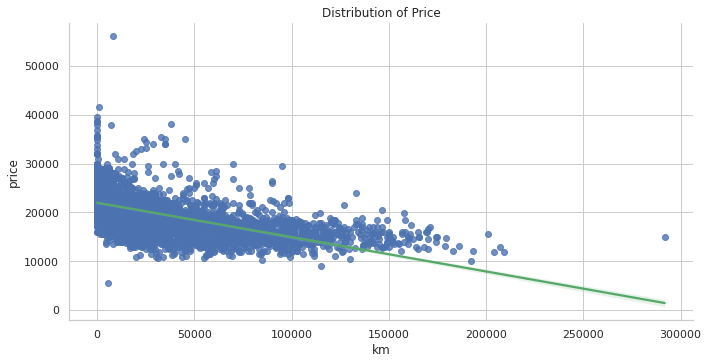

In [ ]:
sns.lmplot(x="km", y="price", data=CarData, palette='deep', line_kws={'color': 'g'}, height=5, aspect=2)
plt.title('Distribution of Price')

Text(0.5, 1.0, 'Distribution of Price')

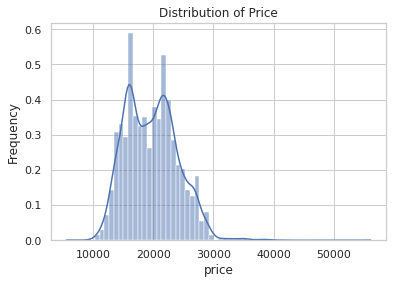

In [ ]:
ax = sns.histplot(CarData['price'], kde=True, palette = 'deep', stat = 'frequency')
plt.title('Distribution of Price')

In [ ]:
CarData.loc[CarData['km'] > 250000]

,make_model,body_type,body_type.1,km,Gearing Type,price
2478,Audi A3,Sedans,Sedans,291800,Manual,14980


In [ ]:
CarData.loc[CarData['price'] > 50000]

,make_model,body_type,body_type.1,km,Gearing Type,price
3002,Audi A3,Other,Convertible,8364,Semi-automatic,56100


In [ ]:
CarData.loc[CarData['price'] < 9000]

,make_model,body_type,body_type.1,km,Gearing Type,price
24,Audi A1,Sedans,Sedans,115000,Manual,8999
2670,Audi A3,Station wagon,Station wagon,5558,Manual,5555


Text(0.5, 1.0, 'Price per body_type')

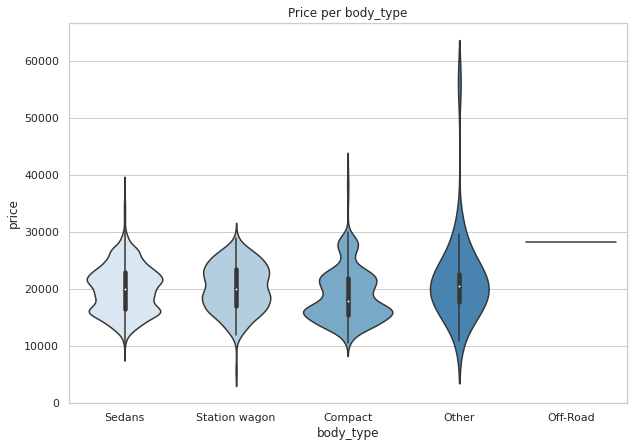

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,7))
sns.violinplot(data=CarData, x="body_type", y="price", palette='Blues')
plt.title('Price per body_type')

Text(0.5, 1.0, 'Price per Gearing Type')

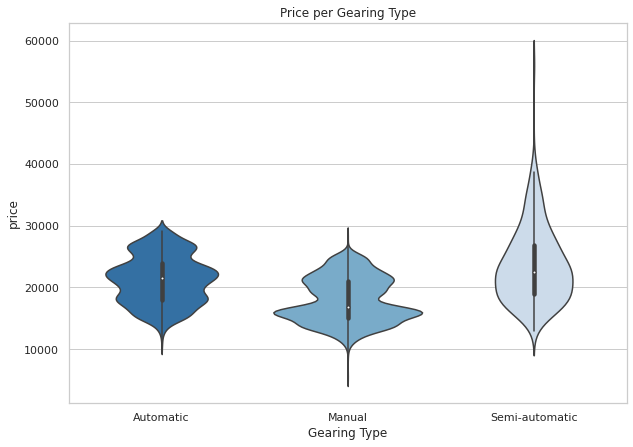

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,7))
sns.violinplot(data=CarData, x="Gearing Type", y="price", palette='Blues_r')
plt.title('Price per Gearing Type')

Text(0.5, 1.0, 'Price per make_model')

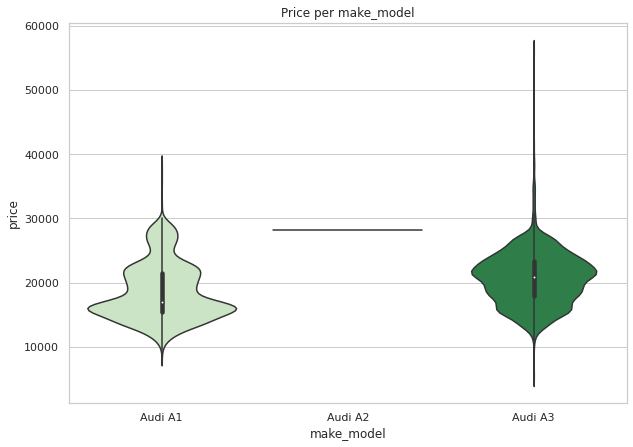

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,7))
sns.violinplot(data=CarData, x="make_model", y="price", palette='Greens')
plt.title('Price per make_model')

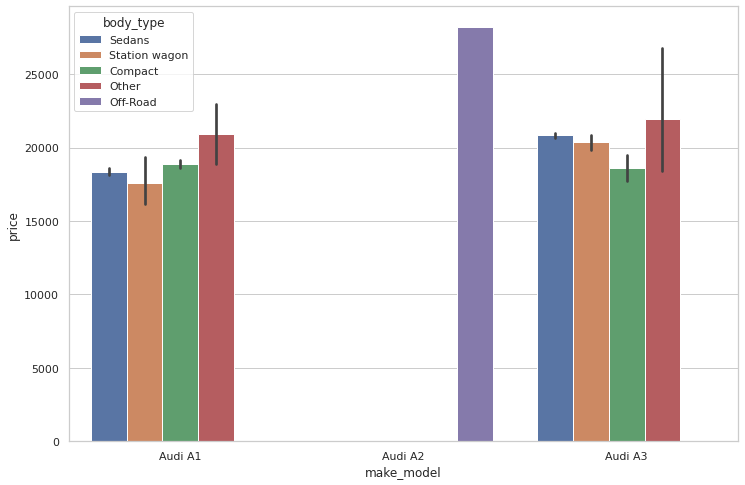

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='make_model', y='price', hue='body_type', data=CarData, palette='deep')

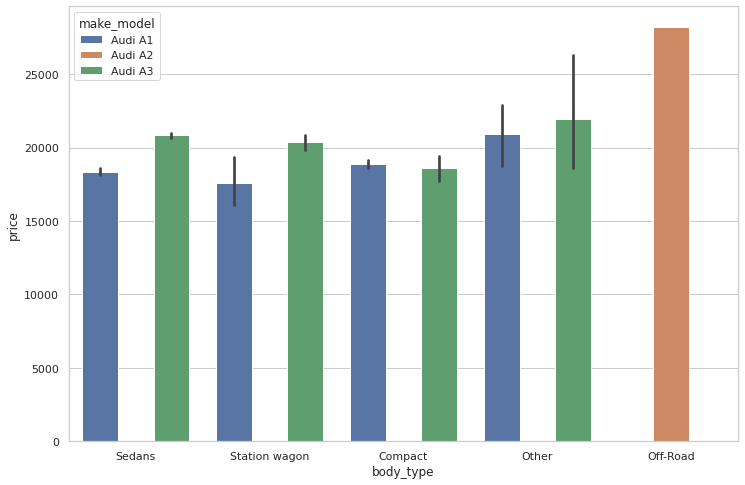

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='body_type', y='price', hue='make_model', data=CarData, palette='deep')

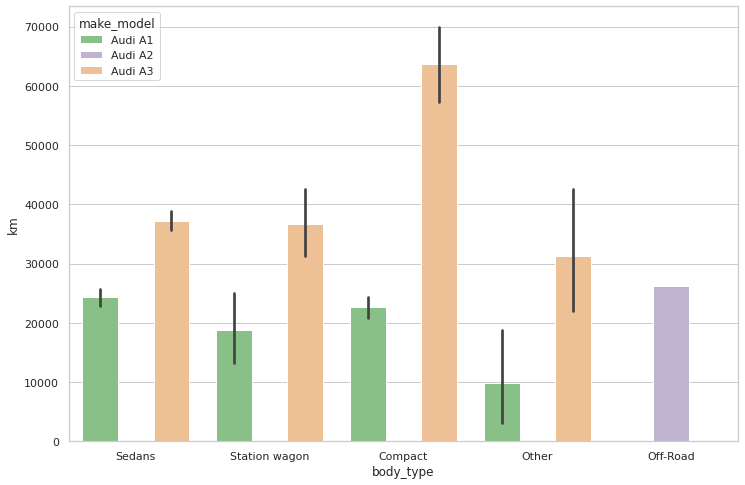

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='body_type', y='km', hue='make_model', data=CarData, palette='Accent')

In [ ]:
CarData.corr()

,km,price
km,1.000000,-0.584079
price,-0.584079,1.000000


In [ ]:
CarData.corr

<bound method DataFrame.corr of      make_model      body_type    body_type.1     km Gearing Type  price
0       Audi A1         Sedans         Sedans  56013    Automatic  15770
1       Audi A1         Sedans         Sedans  80000    Automatic  14500
2       Audi A1         Sedans         Sedans  83450    Automatic  14640
3       Audi A1         Sedans         Sedans  73000    Automatic  14500
4       Audi A1         Sedans         Sedans  16200    Automatic  16790
...         ...            ...            ...    ...          ...    ...
4795    Audi A3         Sedans         Sedans     54       Manual  25000
4796    Audi A3         Sedans         Sedans     50       Manual  24980
4797    Audi A3  Station wagon  Station wagon   6666       Manual  24980
4798    Audi A3         Sedans         Sedans     10       Manual  24980
4799    Audi A3         Sedans         Sedans     10       Manual  24980

[4800 rows x 6 columns]>

# Data Preprocessing

In [ ]:
# Removing Audi A2
CarData = CarData.loc[CarData["make_model"] != 'Audi A2']

In [ ]:
CarData['body_type'] = CarData['body_type'].replace(['Convertible', 'Coupe'], 'Other')

In [ ]:
# Drop unused Column
CarData.drop(columns='body_type.1', axis=1, inplace=True)

In [ ]:
CarData.head()

,make_model,body_type,km,Gearing Type,price
0,Audi A1,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,16200,Automatic,16790


In [ ]:
CarData[CarData.duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 2 to 4799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    955 non-null    object
 1   body_type     955 non-null    object
 2   km            955 non-null    int64 
 3   Gearing Type  955 non-null    object
 4   price         955 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 44.8+ KB


In [ ]:
# Drop Duplicate Data
CarData1 = CarData.drop_duplicates(ignore_index = True)
CarData1.head()

,make_model,body_type,km,Gearing Type,price
0,Audi A1,Sedans,56013,Automatic,15770
1,Audi A1,Sedans,80000,Automatic,14500
2,Audi A1,Sedans,83450,Automatic,14640
3,Audi A1,Sedans,73000,Automatic,14500
4,Audi A1,Sedans,16200,Automatic,16790


In [ ]:
CarData1.drop(CarData1[CarData1['price'] >= 50000].index, inplace = True)

In [ ]:
CarData1.drop(CarData1[CarData1['km'] >= 250000].index, inplace = True)

In [ ]:
CarData1.drop(CarData1[CarData1['price'] <= 9000].index, inplace = True)

In [ ]:
CarData1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4147 non-null   object
 1   body_type     4147 non-null   object
 2   km            4147 non-null   int64 
 3   Gearing Type  4147 non-null   object
 4   price         4147 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 194.4+ KB


#Feature Process

##Encoding

In [ ]:
CarData_fixed = pd.get_dummies(CarData1)

In [ ]:
CarData_fixed.head()

,km,price,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Other,body_type_Sedans,body_type_Station wagon,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic
0,56013,15770,1,0,0,0,1,0,1,0,0
1,80000,14500,1,0,0,0,1,0,1,0,0
2,83450,14640,1,0,0,0,1,0,1,0,0
3,73000,14500,1,0,0,0,1,0,1,0,0
4,16200,16790,1,0,0,0,1,0,1,0,0


In [ ]:
CarData_fixed['results'] = pd.qcut(CarData_fixed['price'], q=4,
                        labels=['Bronze',
                                'Silver',
                                'Gold',
                                'Platinum'])
CarData_fixed.head()

,km,price,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Other,body_type_Sedans,body_type_Station wagon,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,results
0,56013,15770,1,0,0,0,1,0,1,0,0,Bronze
1,80000,14500,1,0,0,0,1,0,1,0,0,Bronze
2,83450,14640,1,0,0,0,1,0,1,0,0,Bronze
3,73000,14500,1,0,0,0,1,0,1,0,0,Bronze
4,16200,16790,1,0,0,0,1,0,1,0,0,Silver


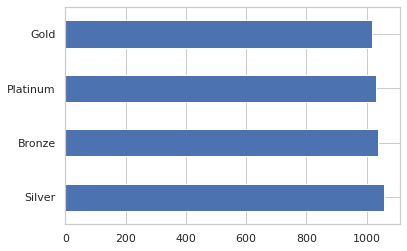

In [ ]:
CarData_fixed['results'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
CarData_fixed.replace({'results':{'Bronze':0, 'Silver':1, 'Gold':2, 'Platinum':3}}, inplace=True)

In [ ]:
CarData_fixed.head(10)

,km,price,make_model_Audi A1,make_model_Audi A3,body_type_Compact,body_type_Other,body_type_Sedans,body_type_Station wagon,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic,results
0,56013,15770,1,0,0,0,1,0,1,0,0,0
1,80000,14500,1,0,0,0,1,0,1,0,0,0
2,83450,14640,1,0,0,0,1,0,1,0,0,0
3,73000,14500,1,0,0,0,1,0,1,0,0,0
4,16200,16790,1,0,0,0,1,0,1,0,0,1
5,63668,15090,1,0,0,0,1,0,1,0,0,0
6,62111,16422,1,0,0,0,0,1,1,0,0,1
7,14986,14480,1,0,1,0,0,0,1,0,0,0
8,57000,16700,1,0,0,0,1,0,1,0,0,1
9,16103,17990,1,0,0,0,1,0,1,0,0,1


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
CarData_fixed_scaled = scaler.fit_transform(CarData_fixed)
CarData_fixed_scaled = scaler.transform(CarData_fixed)

In [ ]:
CarData_fixed_scaled = pd.DataFrame(CarData_fixed_scaled)
CarData_fixed_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.268005,0.183204,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
1,0.382775,0.142880,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
2,0.399282,0.147325,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
3,0.349282,0.142880,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
4,0.077512,0.215590,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333


In [ ]:
CarData_fixed_scaled = np.array(CarData_fixed_scaled)

## Split train test

In [ ]:
X = CarData_fixed.drop(['price'], axis = 1)
y = CarData_fixed['price']

In [ ]:
X.shape

(4147, 11)

In [ ]:
len(y)

4147

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 25)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3317, 11)
(3317,)
(830, 11)
(830,)


#Modeling

In [ ]:
#Machine Learning Library
from sklearn import neighbors
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.preprocessing import MinMaxScaler # Data Scaling
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
column_names = CarData_fixed.drop(columns = ['price']).columns
no_of_features = []
r_squared_train = []
r_squared_test = []

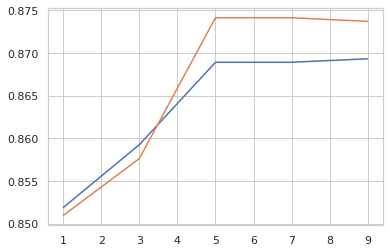

In [ ]:
for k in range(1, 10, 2): # From 1 to 11 variables (every single one)
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k = 5)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['km', 'make_model_Audi A1', 'Gearing Type_Automatic',
       'Gearing Type_Manual', 'results'],
      dtype='object')

In [ ]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test) # R2
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), SVR(), RandomForestRegressor(),  XGBRegressor(), GradientBoostingRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

[14:00:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Features,Model,Score
0,Linear,LinearRegression(),0.874150
1,Linear,SVR(),0.089276
2,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.881902
3,Linear,XGBRegressor(),0.907614
4,Linear,([DecisionTreeRegressor(criterion='friedman_ms...,0.905656


##Gradient Boosting Regression




In [ ]:
regressor_GBR = GradientBoostingRegressor(random_state = 62)
regressor_GBR.fit(X_train_transformed, y_train)

Y_pred_GBR = regressor_GBR.predict(X_train_transformed)

In [ ]:
Y_test_GBR = y_test.reset_index() # To join the Dataframes


Y_pred_DFGBR = pd.DataFrame({'Price_prediction': Y_pred_GBR.flatten()})

In [ ]:
ComparisonGBR = Y_test_GBR.join(Y_pred_DFGBR) 
ComparisonGBR = ComparisonGBR.drop(['index'], axis=1)
ComparisonGBR.head(10)

,price,Price_prediction
0,15990,17198.349809
1,23900,17375.127944
2,20950,23778.589105
3,20480,12990.858277
4,16950,20053.296585
5,16480,14076.834387
6,15430,24611.060851
7,13840,26053.000882
8,16900,14100.662760
9,20400,25942.212984


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
dt_reg = GradientBoostingRegressor()
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)

In [ ]:
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
print("MAE of Gradient Boosting regression model is: ", dt_reg_mae)
print("R2 Score of Gradient Boosting regression model is: ", dt_reg_r2)

MAE of Gradient Boosting regression model is:  865.961623036871
R2 Score of Gradient Boosting regression model is:  0.9131414458732349


In [ ]:
dt_score = cross_val_score(dt_reg, X_test, y_test, cv=4)
print("Gradient Boosting Model accuracy is:", dt_score.mean()*100)

Gradient Boosting Model accuracy is: 90.0125513226528


## XGBoost Regression

In [ ]:
regressor_XGB = XGBRegressor(random_state = 62)
regressor_XGB.fit(X_train_transformed, y_train)

Y_pred_XGB = regressor_XGB.predict(X_test_transformed)

[14:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Y_test_XGB = y_test.reset_index() # To join the Dataframes


Y_pred_DFXGB = pd.DataFrame({'Price_prediction': Y_pred_XGB.flatten()})

In [ ]:
ComparisonXGB = Y_test_XGB.join(Y_pred_DFXGB) 
ComparisonXGB = ComparisonXGB.drop(['index'], axis=1)
print(ComparisonXGB.head(10))
print(ComparisonXGB.tail(10))

   price  Price_prediction
0  15990      16393.960938
1  23900      23880.431641
2  20950      20740.470703
3  20480      21664.949219
4  16950      17686.515625
5  16480      16816.507812
6  15430      14703.771484
7  13840      14854.605469
8  16900      16816.507812
9  20400      20785.402344
     price  Price_prediction
820  21900      21433.324219
821  23600      23619.464844
822  17945      17974.585938
823  24980      23880.431641
824  19397      20273.292969
825  16900      16862.890625
826  19290      20733.064453
827  20490      20740.470703
828  21490      20642.947266
829  15972      14854.605469


In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)

[14:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)
print("MAE of gradient boosting model is: ", xgb_reg_mae)
print("R2 Score of gradient boosting model is: ", xgb_reg_r2)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_reg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_reg_pred)))

MAE of gradient boosting model is:  867.425929499247
R2 Score of gradient boosting model is:  0.9143459311335747
Mean Squared Error: 1527384.461987978
Root Mean Squared Error: 1235.8739668703997


In [ ]:
xgb_score = cross_val_score(xgb_reg, X_test, y_test, cv=4)
print("XGBoost model accuracy is:", xgb_score.mean()*100)

[14:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model accuracy is: 90.24038230653264
